In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# THIS PROJECT IS FOR THE PREDICTION OF MAXIMUM AND MINIMUM TEMPRATURE


df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape  # CHECKING THE SHAPE OF DATA 

(7752, 25)

In [4]:
df.info()    # DATA IS OF FLOAT TYPE WITH JUST ONE OBJECT 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.isna().sum()  # THERE ARE NULL VALUES AND WILL BE TREATED FURTHER

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df['Date'].value_counts     # CHECKING THE VALUE COUNTS 

<bound method IndexOpsMixin.value_counts of 0       30-06-2013
1       30-06-2013
2       30-06-2013
3       30-06-2013
4       30-06-2013
           ...    
7747    30-08-2017
7748    30-08-2017
7749    30-08-2017
7750           NaN
7751           NaN
Name: Date, Length: 7752, dtype: object>

In [7]:
df.mean()  # CHECKING THE MEAN AND MEDIAN OF DATA THEY ARE IDENTICAL 

station               13.000000
Present_Tmax          29.768211
Present_Tmin          23.225059
LDAPS_RHmin           56.759372
LDAPS_RHmax           88.374804
LDAPS_Tmax_lapse      29.613447
LDAPS_Tmin_lapse      23.512589
LDAPS_WS               7.097875
LDAPS_LH              62.505019
LDAPS_CC1              0.368774
LDAPS_CC2              0.356080
LDAPS_CC3              0.318404
LDAPS_CC4              0.299191
LDAPS_PPT1             0.591995
LDAPS_PPT2             0.485003
LDAPS_PPT3             0.278200
LDAPS_PPT4             0.269407
lat                   37.544722
lon                  126.991397
DEM                   61.867972
Slope                  1.257048
Solar radiation     5341.502803
Next_Tmax             30.274887
Next_Tmin             22.932220
dtype: float64

In [8]:
df.median()

station               13.000000
Present_Tmax          29.900000
Present_Tmin          23.400000
LDAPS_RHmin           55.039024
LDAPS_RHmax           89.793480
LDAPS_Tmax_lapse      29.703426
LDAPS_Tmin_lapse      23.760199
LDAPS_WS               6.547470
LDAPS_LH              56.865482
LDAPS_CC1              0.315697
LDAPS_CC2              0.312421
LDAPS_CC3              0.262555
LDAPS_CC4              0.227664
LDAPS_PPT1             0.000000
LDAPS_PPT2             0.000000
LDAPS_PPT3             0.000000
LDAPS_PPT4             0.000000
lat                   37.550700
lon                  126.995000
DEM                   45.716000
Slope                  0.618000
Solar radiation     5436.345215
Next_Tmax             30.500000
Next_Tmin             23.100000
dtype: float64

In [9]:
# dropping date and target variables to make new data ,so we can replace the naan values with the mean in next step

df_new=df.drop(['Date','Next_Tmax','Next_Tmin'],axis=1)

# PUTTING DROPED COLUMN IN ANOTHER DATASET 

df_droped=df[['Date','Next_Tmax','Next_Tmin']]

In [10]:
df_new.head()  # CHECKING THE COLUMNS 

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [11]:
df_droped.head()

,Date,Next_Tmax,Next_Tmin
0,30-06-2013,29.1,21.2
1,30-06-2013,30.5,22.5
2,30-06-2013,31.1,23.9
3,30-06-2013,31.7,24.3
4,30-06-2013,31.2,22.5


In [12]:
df_1=df_new.fillna(df_new.mean()) # REPLACED THE NAAN VALUES WITH THE MEAN and creating a new data 

In [13]:
df_1.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [14]:
df_1.isnull().sum()  # ALL NULL VALUES ARE GONE !YAAY!

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
dtype: int64

In [15]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

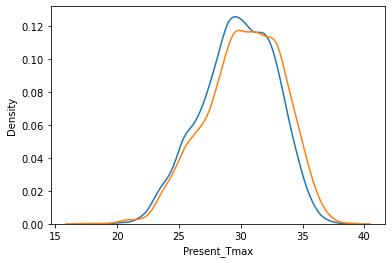

In [16]:
sns.kdeplot(data=df,x='Present_Tmax',legend=True)
sns.kdeplot(data=df,x='Next_Tmax',legend=True)       # visualising present max and next day max on kde 


<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

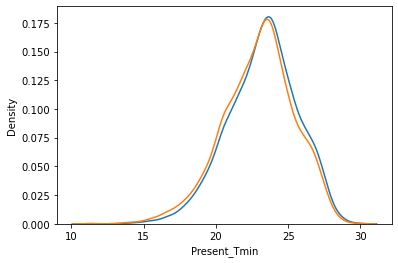

In [17]:
sns.kdeplot(data=df,x='Present_Tmin',legend=True)
sns.kdeplot(data=df,x='Next_Tmin',legend=True)
                                                 # visualising present min and next day min on kde  

In [18]:
temp=df[df.Date=='30-06-2013'] # TAKING OUT DATA FOR ONE DATE FOR ALL THE SATIONS AND ALL DIFFRENT TEMP 

temp_present_sorted=temp['Present_Tmax'].sort_values(ascending=False) #sorting present temprature 
temp_next_sorted=temp['Next_Tmax'].sort_values(ascending=False) #sorting Next_Tmax temprature 


In [97]:
x=temp_present_sorted[0:5]  # top 5 present max temp
print(x)

17    32.8
22    32.7
24    32.5
14    32.5
21    32.2
Name: Present_Tmax, dtype: float64


In [98]:
y=temp_next_sorted[0:5]     # top 5 next max temp 
print(y)

17    33.1
11    32.6
21    32.6
24    32.0
22    31.8
Name: Next_Tmax, dtype: float64


<AxesSubplot:xlabel='Date', ylabel='Present_Tmax'>

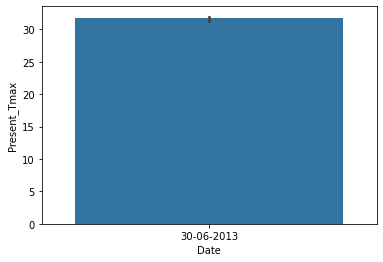

In [22]:
sns.barplot(data=temp,x='Date',y='Present_Tmax')

In [23]:
# COMBINING THE DATASETS CREATED EARLIER ,WITH NO NULL VALUES 

df_final=pd.concat([df_1,df_droped],axis=1)

In [24]:
df_final.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Date,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,30-06-2013,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30-06-2013,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,30-06-2013,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,30-06-2013,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,30-06-2013,31.2,22.5


In [25]:
# THERE ARE INFINITE VALUES 

# removing the infinite values by first converting them to naan and then removing the naan values 


df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df_final.dropna(inplace=True)



In [26]:
# CONVERT DATECOLUMN TO DATETIME AND EXTRACTING DATE, MONTH AND YEAR SEPERATELY 

df_final['day_of_temp']=pd.to_datetime(df_final.Date,format='%d-%m-%Y').dt.day
df_final['month_of_temp']=pd.to_datetime(df_final.Date,format='%d-%m-%Y').dt.month
df_final['year_of_temp']=pd.to_datetime(df_final.Date,format='%d-%m-%Y').dt.year

In [27]:
df_final.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Date,Next_Tmax,Next_Tmin,day_of_temp,month_of_temp,year_of_temp
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,30-06-2013,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30-06-2013,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,30-06-2013,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,30-06-2013,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,30-06-2013,31.2,22.5,30,6,2013


In [28]:
# DROPPING THE DATE COLUMN AS WE HAVE MADE 3 COLUMNS OUT OF IT 


df_final.drop('Date',axis=1,inplace=True)

In [29]:
df_final.head(3)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day_of_temp,month_of_temp,year_of_temp
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013


<AxesSubplot:>

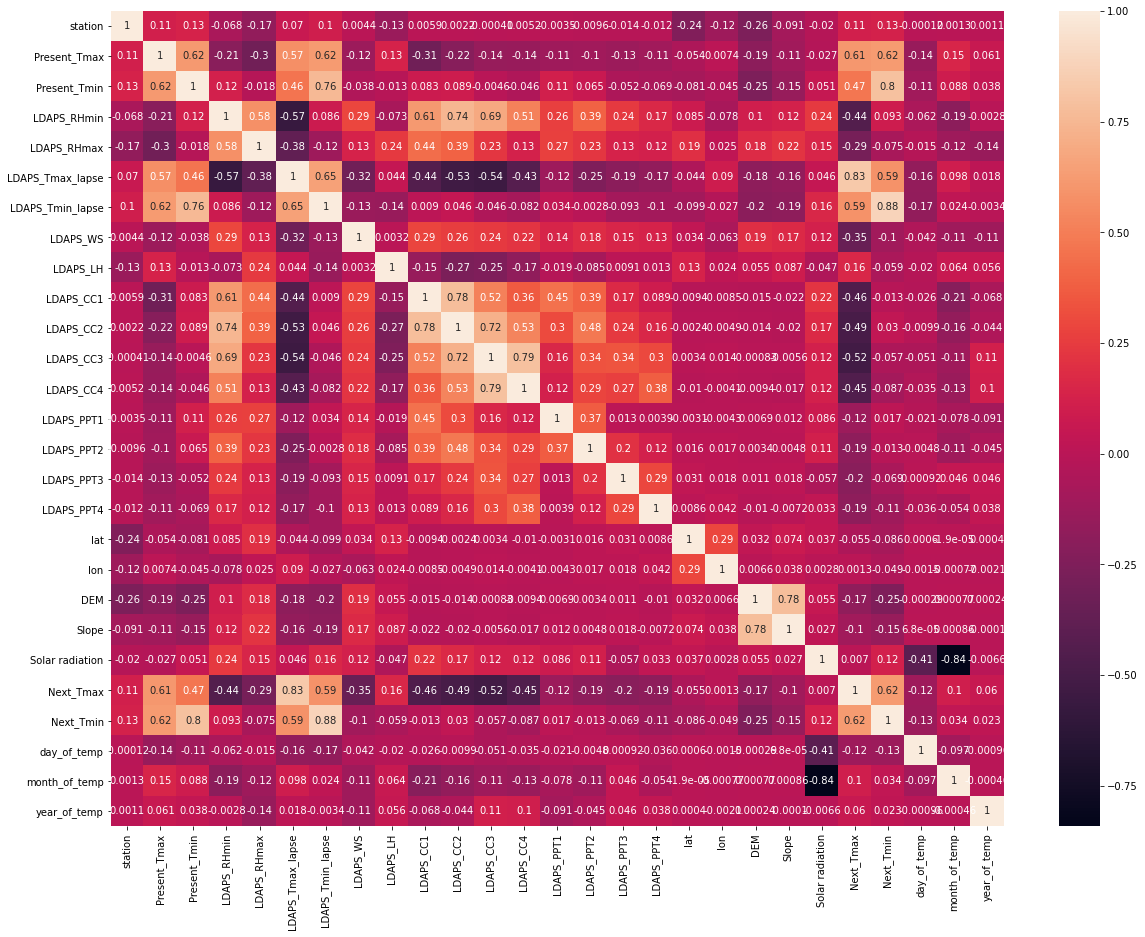

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(df_final.corr(),annot=True)

In [31]:
# NEXT TMAX HAS GOOD CORELATION WITH TMIN ,PRESENT TEMP,LDAP TMAX LAP 
# NEXT TMAX HAS GOOD CORELATION WITH MONTH OF TEMP
# DEM IS NEGITIVELY RELATED WITH BOTH THE TARGET COLUMNS 



In [32]:
x=df_final.drop('Next_Tmax',axis=1)
y=df_final['Next_Tmax']

In [33]:
#APPLYING VARIANCE INFLATION ON X DATA 

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_temp():
    vif=pd.DataFrame()
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['feature']=x.columns
    print(vif)

In [35]:
vif_temp()

      VIF FACTOR           feature
0   5.179653e+00           station
1   2.931922e+02      Present_Tmax
2   3.359640e+02      Present_Tmin
3   1.069387e+02       LDAPS_RHmin
4   3.524122e+02       LDAPS_RHmax
5   7.938671e+02  LDAPS_Tmax_lapse
6   9.471325e+02  LDAPS_Tmin_lapse
7   1.503279e+01          LDAPS_WS
8   6.847746e+00          LDAPS_LH
9   1.049580e+01         LDAPS_CC1
10  1.534130e+01         LDAPS_CC2
11  1.389384e+01         LDAPS_CC3
12  7.156277e+00         LDAPS_CC4
13  1.563576e+00        LDAPS_PPT1
14  1.579863e+00        LDAPS_PPT2
15  1.342178e+00        LDAPS_PPT3
16  1.351094e+00        LDAPS_PPT4
17  7.142823e+05               lat
18  1.651936e+06               lon
19  8.982256e+00               DEM
20  5.863145e+00             Slope
21  6.019320e+03   Solar radiation
22  5.191068e+02         Next_Tmin
23  4.116771e+01       day_of_temp
24  6.217580e+03     month_of_temp
25  1.275854e+06      year_of_temp


In [36]:
#VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem

# SO I AM KEPPING VIF VALUE OF 6.5 AS A THRESHOLD ANYTHING ABOVE THAT WILL BE CONSIDERED AS CONCERN 


# WE CAN SEE THAT VIF VALUES ARE HIGH IN (DEM,LDAPS_Tmin_lapse,LDAPS_Tmax_lapse,LDAPS_LH,LDAPS_CC4,lat)


# NOW WE WILL CHECK THE RELATION OF THESE COLUMNS WITHT HE TARGET AND WILL DROP ACCORDINGLY 


# LDAPS_Tmin_lapse,LDAPS_Tmax_lapse ARE SHOWING MULTICOLINEARITY SO WE WILL DROP LDASPS_TMIN AS THE VIF SCORE IS VERY HIGH 
# LDAPS_CC4 will be dropped as it has negitve corelation with both target variable 
# LAT ,DEM WILL BE DROPPED 


In [37]:
df_final.drop(['LDAPS_CC4','LDAPS_Tmin_lapse','lat','DEM'],axis=1,inplace=True)


In [38]:
df_final.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lon,Slope,Solar radiation,Next_Tmax,Next_Tmin,day_of_temp,month_of_temp,year_of_temp
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,6.818887,69.451805,0.233947,0.203896,0.161697,0.0,0.0,0.0,0.0,126.991,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,5.691890,51.937448,0.225508,0.251771,0.159444,0.0,0.0,0.0,0.0,127.032,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,6.138224,20.573050,0.209344,0.257469,0.204091,0.0,0.0,0.0,0.0,127.058,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,5.650050,65.727144,0.216372,0.226002,0.161157,0.0,0.0,0.0,0.0,127.022,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,5.735004,107.965535,0.151407,0.249995,0.178892,0.0,0.0,0.0,0.0,127.135,0.5055,5859.552246,31.2,22.5,30,6,2013


In [39]:
df_final.shape

(7723, 23)

In [40]:
# DIVIDING THE DATA INTO DEPENDENT AND INDEPENDENT FOR TRAINING AND TESTING USE, TAKING NEXT TMAX AS TARGET VARIABLE FIRST 


x=df_final.drop('Next_Tmax',axis=1)
y=df_final['Next_Tmax']

In [41]:
x.shape

(7723, 22)

In [42]:
y.shape

(7723,)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5792, 22)
(5792,)
(1931, 22)
(1931,)


In [49]:
#APPLYING STANDARD SCALER TO BALANCE THE DATA 

sc=StandardScaler()
sc.fit(x_train,x_test)

StandardScaler()

In [50]:
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [51]:
# APPLYING RANDOM FOREST 

from sklearn.ensemble import RandomForestRegressor

In [52]:
rfc=RandomForestRegressor(n_estimators=100)
rfc.fit(x_train,y_train)
prfc=rfc.predict(x_test)


In [53]:
rfc.score(x_train,y_train)

0.987930784864795

In [54]:
rfc.score(x_test,y_test)

0.9089546217541088

In [55]:
from sklearn import metrics

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prfc))
print('MSE:', metrics.mean_squared_error(y_test, prfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prfc)))

MAE: 0.6865137234593472
MSE: 0.8629171361988609
RMSE: 0.9289333324834785


In [58]:
# APPLYING DECISION TREE 


from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred=dtr.predict(x_test)
dscore=dtr.score(x_test,y_test)
dscore

0.7894063404477003

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test,dpred))
print('MSE:', metrics.mean_squared_error(y_test, dpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,dpred)))

MAE: 1.0105644743656137
MSE: 1.995981356809943
RMSE: 1.4127920430162193


In [65]:

# APPLYING POLYNOMIAL REGRESSION 


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly=PolynomialFeatures(degree=2)
poly.fit(x_train)
x_train_poly=poly.transform(x_train)
x_test_poly=poly.transform(x_test)

In [67]:
lr=LinearRegression()

In [68]:
lr.fit(x_train_poly,y_train)

LinearRegression()

In [74]:

lr.score(x_test_poly,y_test)

0.8690023175206035

In [75]:


from sklearn.linear_model import Lasso,Ridge

In [76]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7919429061342165

In [78]:
ls.score(x_test,y_test)

0.7962487382271333

In [77]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7919431629311094

# THE BEST MODEL IS RANDOM FOREST WITH THE ACCURACY OF 90%

In [99]:
#SAVING THE BEST MODEL 

import  pickle as pk
file=open('temprature_prediction.pkl','wb')
pk.dump(rfc,file)

In [79]:
# NOW WE WILL PREDICT THE OTHER TARGET 

# DIVIDING THE DATA INTO DEPENDENT AND INDEPENDENT FOR TRAINING AND TESTING USE, TAKING NEXT TMin AS TARGET VARIABLE NOW


x=df_final.drop('Next_Tmin',axis=1)
y=df_final['Next_Tmin']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [81]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5792, 22)
(5792,)
(1931, 22)
(1931,)


In [82]:
#APPLYING STANDARD SCALER TO BALANCE THE DATA 

sc=StandardScaler()
sc.fit(x_train,x_test)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [83]:

#APPLYING RANDOM FOREST

rfc=RandomForestRegressor(n_estimators=100)
rfc.fit(x_train,y_train)
prfc=rfc.predict(x_test)
rfc.score(x_train,y_train)

0.9861256841078643

In [84]:
rfc.score(x_test,y_test)

0.906349871276918

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test,prfc))
print('MSE:', metrics.mean_squared_error(y_test, prfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prfc)))

MAE: 0.5552692905230452
MSE: 0.5498123868461937
RMSE: 0.7414933491584356


In [86]:
# APPLYING DECISION TREE 


from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred=dtr.predict(x_test)
dscore=dtr.score(x_test,y_test)
dscore

0.7656285138600948

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test,dpred))
print('MSE:', metrics.mean_squared_error(y_test, dpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,dpred)))

MAE: 0.8429311237700672
MSE: 1.3759761781460385
RMSE: 1.1730201098642932


In [90]:

# APPLYING POLYNOMIAL REGRESSION 

poly=PolynomialFeatures(degree=2)
poly.fit(x_train)
x_train_poly=poly.transform(x_train)
x_test_poly=poly.transform(x_test)

In [92]:
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
lr.score(x_test_poly,y_test)

0.8625489374207126

# THE BEST MODEL IS RANDOM FOREST WITH 90% 

In [100]:
#SAVING THE BEST MODEL 

import  pickle as pk
file=open('temprature_min_prediction.pkl','wb')
pk.dump(rfc,file)

# *CONCLUSION

In [ ]:
THIS PROJECT HAS TAUGHT ME AND MADE ME EXPERIENCE METHODS LIKE VIF AND FEATURE ENGINEERING 
I HAVE CREATED A PREDICTIVE MODEL TO PREDICT MIN AND MAX TEMP AS THIS HAD TWO TARGET VARIABLES 